Practice Skills
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting❓


[Sheet](https://docs.google.com/spreadsheets/d/1oIHcpjVohkSCixdoWnEF35S5E-iqZLYNqbPz7a0WJ-c/edit?usp=sharing)

## 导入数据

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# sklearn 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer,TargetEncoder,PolynomialFeatures
from sklearn.impute import SimpleImputer

# 各种模型
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,LassoCV, Ridge,RidgeCV,ElasticNetCV, ElasticNet, LinearRegression,BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import TransformedTargetRegressor

In [3]:
traindata = pd.read_csv('data/train.csv',index_col='Id')
# 同步读取后续修改， 只是test不能剔除异常行
testdata = pd.read_csv('data/test.csv',index_col='Id')


In [4]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [5]:
traindata.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
traindata.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

## 预处理：
- 列 分类、聚合。 
- 行：异常值剔除

### 数值数据
- 有数值意义：日期，大小
- 无数值意义：分类

In [7]:
traindata.select_dtypes(include=['float64','int64'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [8]:
numeric_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea',
     'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
     'MiscVal','MoSold' ,'YrSold',
     'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
'GarageCars']

In [9]:
numeric_missing_stat = traindata[numeric_cols].isnull().sum()
numeric_missing_stat[numeric_missing_stat>0]

LotFrontage    259
MasVnrArea       8
dtype: int64

In [10]:
numeric_missing_stat_test = testdata[numeric_cols].isnull().sum()
numeric_missing_stat_test[numeric_missing_stat_test>0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageArea        1
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
dtype: int64

#### 1.日期 
转换为具有数值意义的
`'GarageYrBlt','YearRemodAdd','YearBuilt'`

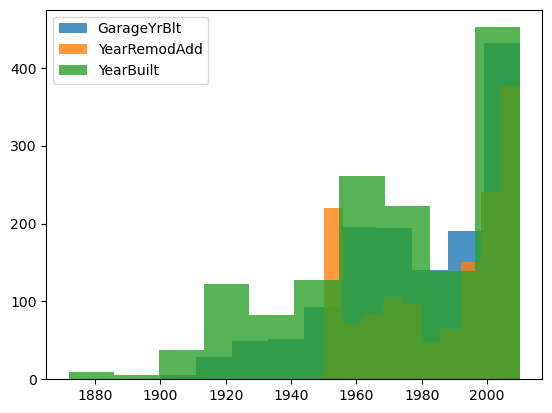

In [11]:
plt.hist(traindata.GarageYrBlt, alpha=0.8,label='GarageYrBlt')
plt.hist(traindata.YearRemodAdd, alpha=0.8,label='YearRemodAdd')
plt.hist(traindata.YearBuilt, alpha=0.8,label='YearBuilt')
plt.legend()

**空值填充 : 完整起见应该每一列都提供空值填充。竞赛而言就是 填充需要的。**

#### 2. 数值

In [12]:
numeric_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [13]:
numeric_missing_stat_test = testdata[numeric_cols].isnull().sum()
numeric_missing_stat_test[numeric_missing_stat_test>0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageArea        1
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
dtype: int64

In [14]:
numeric_missing_stat = traindata[numeric_cols].isnull().sum()
numeric_missing_stat[numeric_missing_stat>0]

LotFrontage    259
MasVnrArea       8
dtype: int64

### 类别数据

- 无序类别：One-Hot Encoding，Target Encoding， label encoding
- 有序类别： orignal encoding。 有的1-10有正常顺序不需要编码

In [15]:
traindata.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
categorical_cols = ['MSSubClass','OverallQual','OverallCond',
                    'CentralAir',
                    'MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
      'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
      'Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional',
      'GarageType','GarageFinish','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition'
                   ]

In [17]:
traindata['Alley'].isnull().sum()
testdata['Alley'].isnull().sum() # TOO much null

np.int64(1352)

In [18]:
# cols 👆
# data.drop('Alley',axis=1,inplace=True)
# testdata.drop('Alley',axis=1,inplace=True)

In [19]:
traindata.CentralAir.value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [20]:
traindata[['MSSubClass','OverallQual','OverallCond']]

,MSSubClass,OverallQual,OverallCond
Id,,,
1,60,7,5
2,20,6,8
3,60,7,5
4,70,7,5
5,60,8,5
...,...,...,...
1456,60,6,5
1457,20,6,6
1458,70,7,9


In [21]:
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
traindata[ordinal_cols].isnull().sum()

ExterQual          0
ExterCond          0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
HeatingQC          0
KitchenQual        0
FireplaceQu      690
GarageQual        81
GarageCond        81
PoolQC          1453
dtype: int64

## 空值填充

数值数据

## 异常值剔除

In [22]:
ids = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [23]:
traindata = traindata.drop(ids, axis=0)

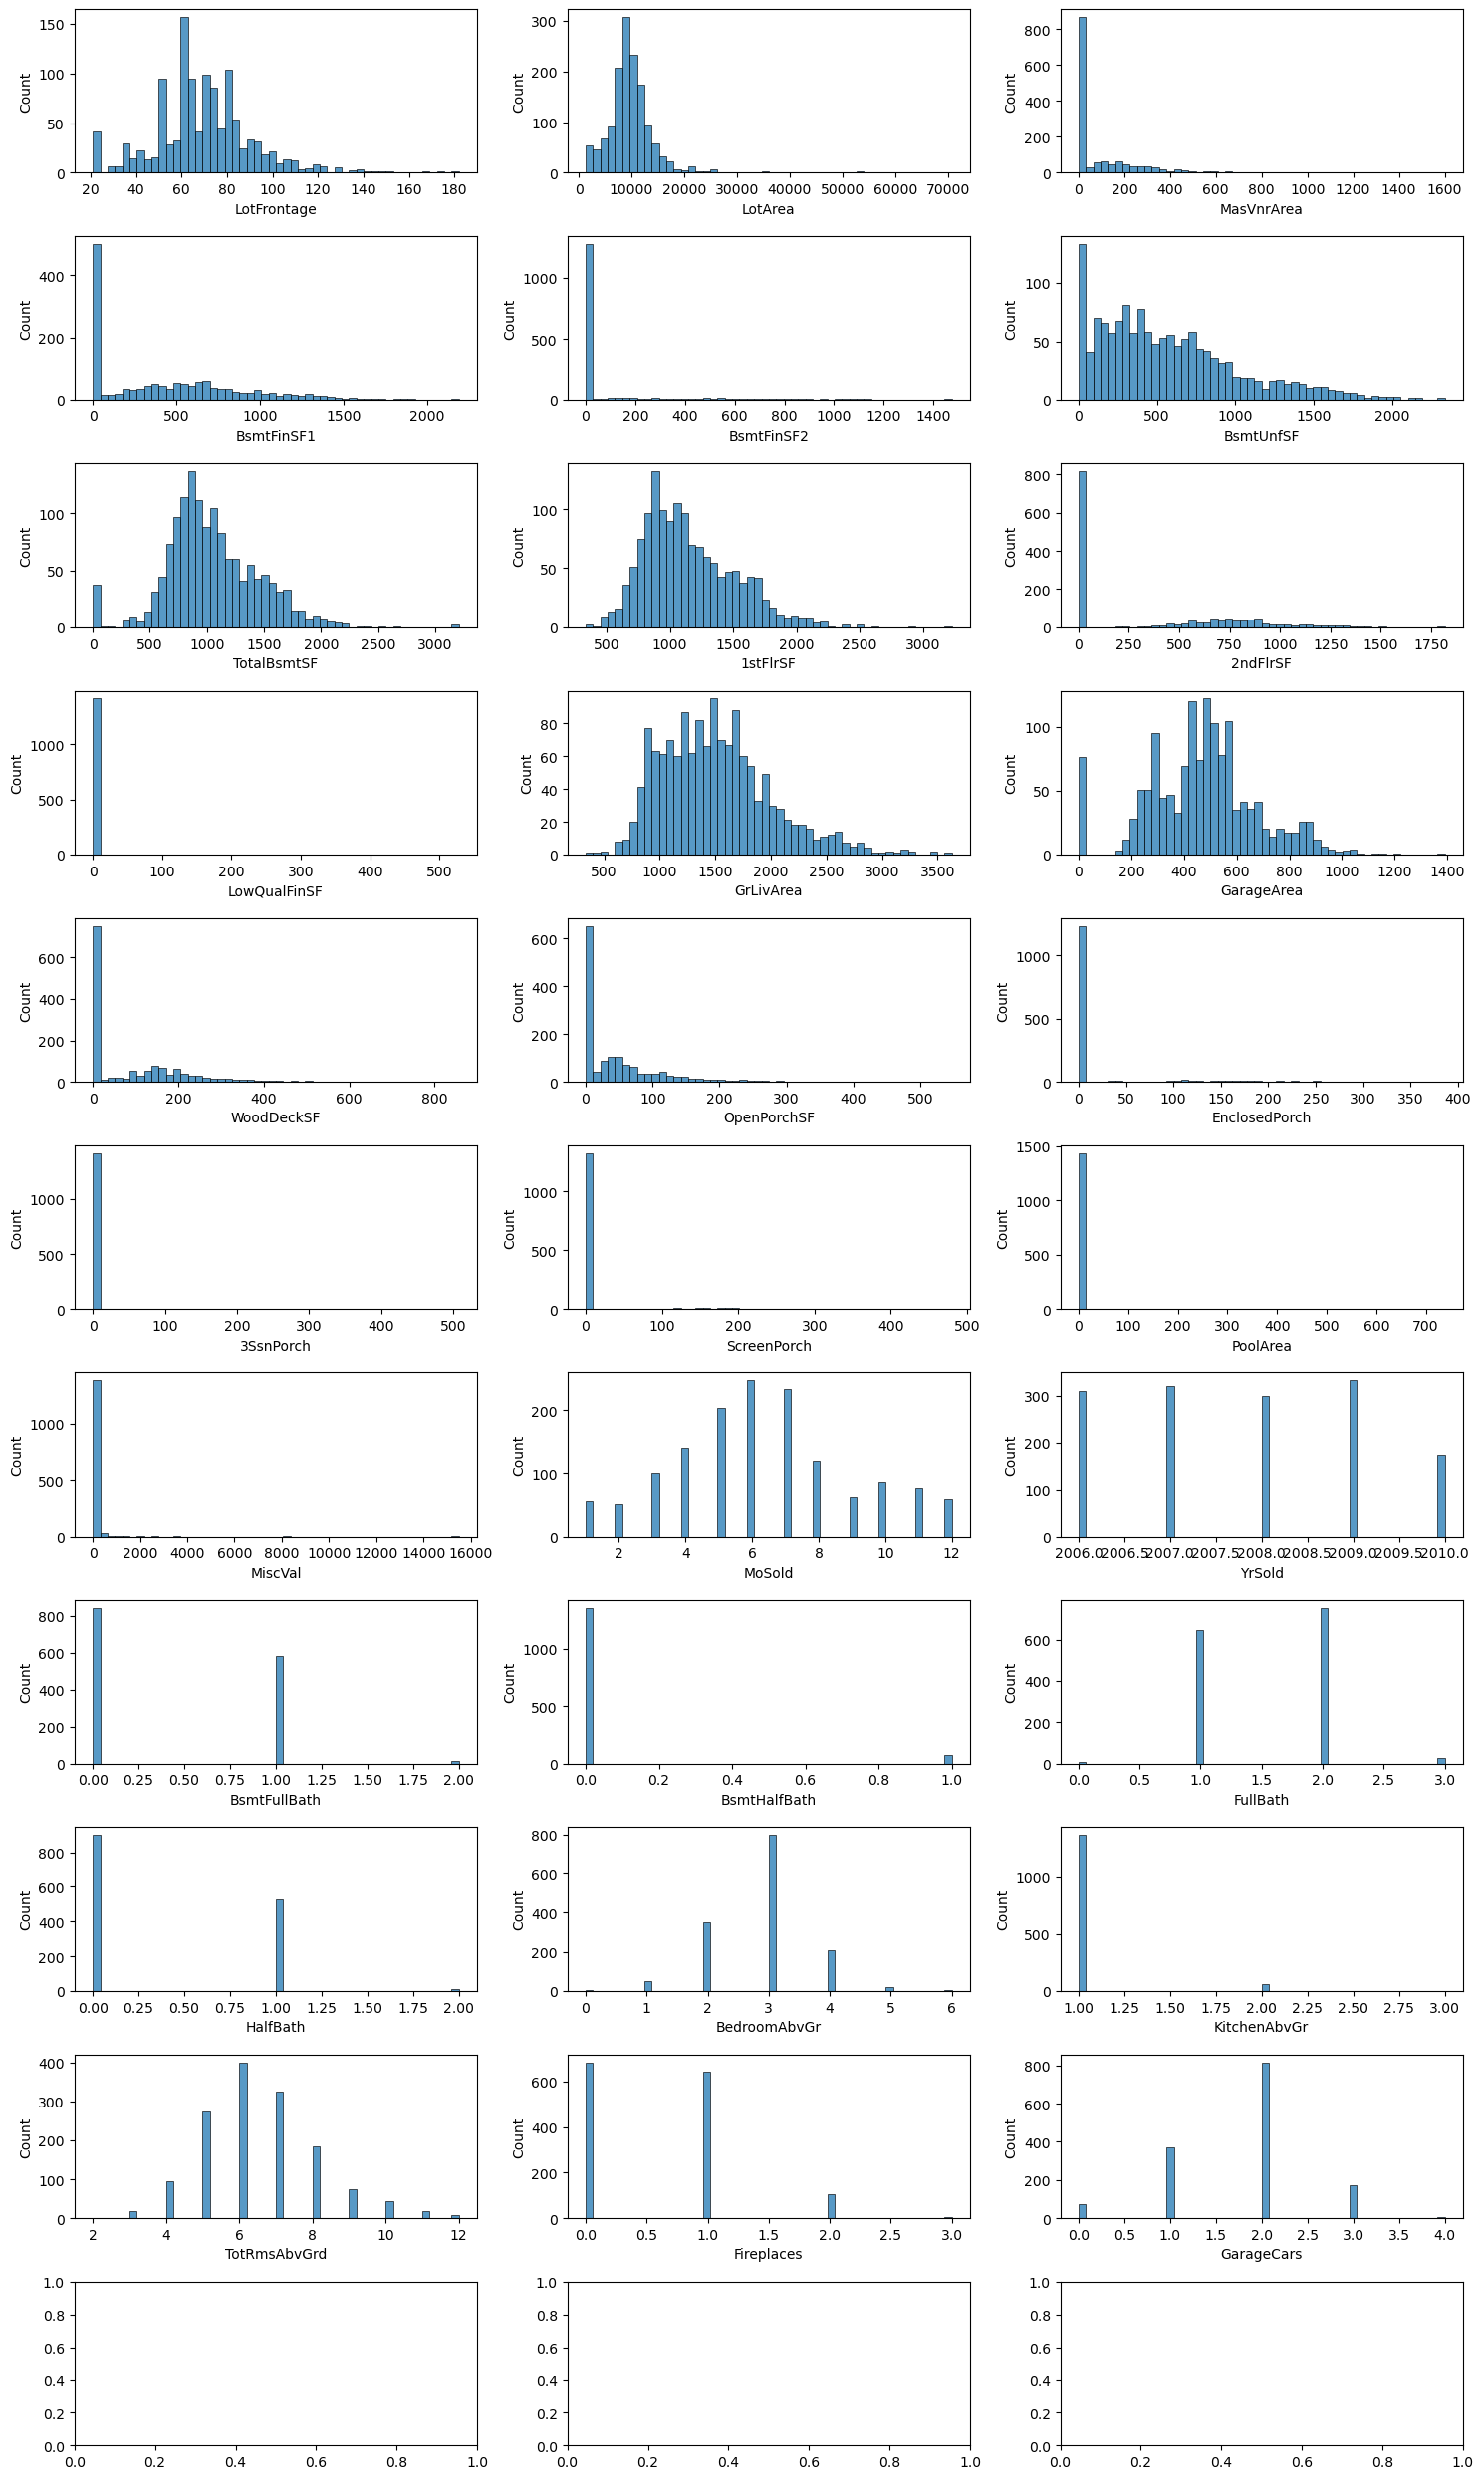

In [24]:
fig,axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize= (15,25))
axes = axes.ravel()
for i,col in enumerate(numeric_cols):
    sns.histplot(traindata[col], ax = axes[i], bins=50,label=f"{col}")
fig.tight_layout()

## 确定数据集列，构建XY

In [25]:
traindata_x=traindata[numeric_cols+ordinal_cols+categorical_cols]
traindata_y= traindata.SalePrice
print(traindata_x.shape)


(1439, 75)


## 管道：数据转换

In [26]:
# 函数保持 DataFrame 操作
def fix_garage_yr_blt(df):
    df['GarageYrBlt'] = np.maximum(df['GarageYrBlt'], df['YearBuilt'])
    return df

def add_features(df):
    df['HouseRawYear'] = df['YearRemodAdd'] - df['YearBuilt']
    df['HouseGarageYear'] = df['GarageYrBlt'] - df['YearBuilt']
    df.drop(columns=['YearRemodAdd','YearBuilt','GarageYrBlt'],inplace=True)
    df['HouseRawYear'] = round(df['HouseRawYear']).astype(int)
    df['HouseGarageYear'] = round(df['HouseGarageYear']).astype(int)
    return df.values

In [27]:
date_cols = ['GarageYrBlt','YearBuilt','YearRemodAdd']

In [28]:
date_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('to_dataframe', FunctionTransformer(lambda X: pd.DataFrame(X, columns=date_cols), validate=False)),
    ('fix_garage_yr', FunctionTransformer(fix_garage_yr_blt, validate=False)),
    ('add_features', FunctionTransformer(add_features, validate=False)),
    ('log_transform', FunctionTransformer(np.log1p, validate=False)),  # 取对数
    ('std_scaler', StandardScaler())                                # 标准化
])

In [29]:
date_pipeline.fit_transform(traindata[date_cols])

array([[-0.75318785, -0.49972714],
       [-0.75318785, -0.49972714],
       [-0.33120657, -0.49972714],
       ...,
       [ 1.79743332, -0.49972714],
       [ 1.59074466, -0.49972714],
       [-0.75318785, -0.49972714]], shape=(1439, 2))

In [30]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # 填充缺失值
    ('log_transform', FunctionTransformer(np.log1p, validate=False, feature_names_out="one-to-one")),  # 取对数
    ('std_scaler', StandardScaler())                                # 标准化
])

In [31]:
numeric_pipeline.fit_transform(traindata[numeric_cols])

array([[-0.06246848, -0.11160869,  1.21029479, ...,  0.9700246 ,
        -1.01014243,  0.39701995],
       [ 0.6069953 ,  0.14971436, -0.80517363, ..., -0.2188955 ,
         0.75910161,  0.39701995],
       [ 0.08284235,  0.47454859,  1.13802092, ..., -0.2188955 ,
         0.75910161,  0.39701995],
       ...,
       [-0.01331033,  0.02707172, -0.80517363, ...,  1.46846488,
         1.79404302, -0.88068783],
       [ 0.08284235,  0.17452415, -0.80517363, ..., -0.94815264,
        -1.01014243, -0.88068783],
       [ 0.39871115,  0.22037658, -0.80517363, ..., -0.2188955 ,
        -1.01014243, -0.88068783]], shape=(1439, 30))

In [32]:
categorical_pipeline  = Pipeline(steps=[
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False))  # 使用 OneHotEncoder
])

In [33]:
categorical_pipeline.fit_transform(traindata[categorical_cols])

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]], shape=(1439, 228))

In [34]:
# 对有序类别进行编码
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),  # 填充缺失值
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))                 # 使用 OrdinalEncoder
])

In [35]:
ordinal_pipeline.fit_transform(traindata[ordinal_cols])

array([[2., 4., 2., ..., 5., 5., 2.],
       [3., 4., 2., ..., 5., 5., 2.],
       [2., 4., 2., ..., 5., 5., 2.],
       ...,
       [0., 2., 4., ..., 5., 5., 2.],
       [3., 4., 4., ..., 5., 5., 2.],
       [2., 4., 4., ..., 5., 5., 2.]], shape=(1439, 13))

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        #('date',date_pipeline,date_cols),
        ('numeric', numeric_pipeline, numeric_cols),            # 数值型处理
        ('ordianl', ordinal_pipeline, ordinal_cols),            # 有序类别处理
        ('categoric', categorical_pipeline, categorical_cols)     # 无序类别处理
    ]
)


## 训练

In [44]:
model_lasso = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(cv=20, max_iter=5000),
        func=np.log1p,         # 对 y 应用的对数转换
        inverse_func=np.expm1  # 预测时反转
    )
)

In [45]:
model_en = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=ElasticNetCV(cv=20,l1_ratio=0.5),
        func=np.log1p,         # 对 y 应用的对数转换
        inverse_func=np.expm1  # 预测时反转
    )
)

In [46]:
model_ridge = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(cv=20,),
        func=np.log1p,         # 对 y 应用的对数转换
        inverse_func=np.expm1  # 预测时反转
    )
)

In [47]:
model_poly_linear = make_pipeline(
    preprocessor,
    PolynomialFeatures(degree=2),
    TransformedTargetRegressor(
        regressor=LinearRegression(fit_intercept=False),
        func=np.log1p,         # 对 y 应用的对数转换
        inverse_func=np.expm1  # 预测时反转
    )
)

In [48]:
model_poly_ridge = make_pipeline(
    preprocessor,
    PolynomialFeatures(degree=2),
    TransformedTargetRegressor(
        regressor=RidgeCV(cv=20),
        func=np.log1p,         # 对 y 应用的对数转换
        inverse_func=np.expm1  # 预测时反转
    )
)

In [49]:
model_bayesian_ridge = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=BayesianRidge(),
        func=np.log1p,         # 对 y 应用的对数转换
        inverse_func=np.expm1  # 预测时反转
    )
)

In [122]:
model_dtree = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=DecisionTreeRegressor(
            max_depth=10,
            min_samples_leaf=2,
            min_samples_split=10,
        ),
        func=np.log1p,         # 对 y 应用的对数转换
        inverse_func=np.expm1  # 预测时反转
    )
)

In [123]:
# CV decision tree📌

In [124]:
models = {
    #'LassoCV':model_lasso,
    #'Elastic-Net':model_en,
    #'RidgeCV':model_ridge,
    #'Poly Linear':model_poly_linear,
    #'Poly Ridge':model_poly_ridge,
    #'Bayesian Ridge':model_bayesian_ridge,
    'Decision Tree Regression':model_dtree,
}

In [125]:
X_train, X_test, y_train, y_test = train_test_split(traindata_x,traindata_y,random_state=42,test_size=0.2)

In [126]:
# linear model
import time
for name,m in models.items():
    t1 = time.time()
    m.fit(X_train,y_train)
    print(f"{name} has trained. {(time.time() - t1 ):.2f} s")

Decision Tree Regression has trained. 0.08 s


In [127]:
for name,m in models.items():
    print(f'{name} R^2 : {m.score(X_test, y_test) : .3f}')    

Decision Tree Regression R^2 :  0.757


coef观测

In [110]:
coefs = model[-1].regressor_.coef_
coefs.shape

NameError: name 'model' is not defined

In [759]:
coefs[coefs==0].shape

(150,)

In [760]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsm...
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'Electrical',
                                                   'Functional', 'GarageType',
                                                   'GarageFinish', 'PavedDrive',
                                                   'Fence', 'MiscFeature', ...])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LassoCV(cv=20,
                                                              max_iter=5000)))])

In [761]:
# 查看训练的稀疏特征
for feature,coef in zip(preprocessor.get_feature_names_out(), coefs):
    if coef==0:
        print(feature)

ordianl__BsmtFinType2
ordianl__PoolQC
categoric__MSSubClass_40
categoric__MSSubClass_45
categoric__MSSubClass_50
categoric__MSSubClass_60
categoric__MSSubClass_70
categoric__MSSubClass_75
categoric__MSSubClass_80
categoric__MSSubClass_85
categoric__MSSubClass_90
categoric__MSSubClass_120
categoric__MSSubClass_160
categoric__MSSubClass_180
categoric__MSSubClass_190
categoric__OverallQual_1
categoric__OverallQual_2
categoric__OverallQual_6
categoric__OverallCond_2
categoric__OverallCond_6
categoric__MSZoning_RH
categoric__MSZoning_RL
categoric__Street_Grvl
categoric__Street_Pave
categoric__LotShape_IR3
categoric__LotShape_Reg
categoric__LandContour_Low
categoric__LandContour_Lvl
categoric__Utilities_AllPub
categoric__Utilities_NoSeWa
categoric__LotConfig_FR3
categoric__LotConfig_Inside
categoric__LandSlope_Gtl
categoric__LandSlope_Mod
categoric__Neighborhood_Blmngtn
categoric__Neighborhood_Blueste
categoric__Neighborhood_BrDale
categoric__Neighborhood_Gilbert
categoric__Neighborhood_NAme

# 预测

In [128]:
testdata = testdata[numeric_cols+ordinal_cols+categorical_cols]

In [129]:
testdata.shape

(1459, 75)

In [130]:
testdata.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Heating,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,...,GasA,SBrkr,Typ,Attchd,Unf,Y,MnPrv,NaN,WD,Normal
1462,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,...,GasA,SBrkr,Typ,Attchd,Unf,Y,NaN,Gar2,WD,Normal
1463,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,...,GasA,SBrkr,Typ,Attchd,Fin,Y,MnPrv,NaN,WD,Normal
1464,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,0,...,GasA,SBrkr,Typ,Attchd,Fin,Y,NaN,NaN,WD,Normal
1465,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,...,GasA,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,WD,Normal


In [131]:
preds = {}

In [132]:
for name,m in models.items():
    testdata_ypred = m.predict(testdata)
    preds[name] = testdata_ypred

In [133]:
preds = pd.DataFrame(preds)
preds.set_index(testdata.index,inplace=True)

## submission

In [134]:
submission_m_name = 'Decision Tree Regression'

In [135]:
submission = pd.DataFrame(
    {
        'Id':preds.index.values,
        'SalePrice':preds[submission_m_name]
    }
)
submission.to_csv('submission.csv', index=False)
submission

,Id,SalePrice
Id,,
1461,1461,104583.674134
1462,1462,153624.223930
1463,1463,177415.601516
1464,1464,171610.424728
1465,1465,200187.514261
...,...,...
2915,2915,84585.694012
2916,2916,84585.694012
2917,2917,139290.011873


In [136]:
submission.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179359.027474
std,421.321334,76924.570756
min,1461.000000,47277.177137
25%,1825.500000,129998.891226
50%,2190.000000,155165.532411
75%,2554.500000,207638.862302
max,2919.000000,498866.646305
